In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [14]:
%matplotlib inline
np.random.seed(2)

In [15]:
train = pd.read_csv("mnist_data/train.csv")
test = pd.read_csv("mnist_data/test.csv")

In [16]:
Y_train = train["label"]

In [17]:
X_train = train.drop(labels = ["label"],axis = 1) 

In [18]:
del train 

/home/sahej/practice/digit-3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


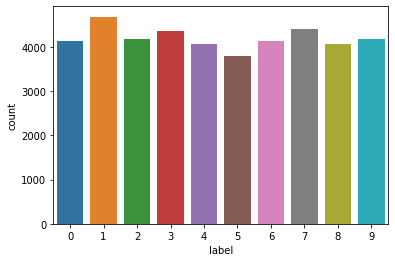

In [19]:
g = sns.countplot(Y_train)

In [20]:
Y_train.value_counts()
X_train.isnull().any().describe()
test.isnull().any().describe()
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [21]:
Y_train = to_categorical(Y_train, num_classes = 10)


In [22]:
random_seed = 2

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

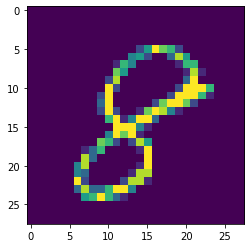

In [24]:
g = plt.imshow(X_train[0][:,:,0])

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [26]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [27]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [29]:
epochs = 30
batch_size = 86

In [30]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val))

Epoch 1/30
440/440 [==============================] - 100s 225ms/step - loss: 0.4923 - accuracy: 0.8378 - val_loss: 0.0632 - val_accuracy: 0.9802
Epoch 2/30
440/440 [==============================] - 102s 232ms/step - loss: 0.0791 - accuracy: 0.9762 - val_loss: 0.0496 - val_accuracy: 0.9867
Epoch 3/30
440/440 [==============================] - 106s 241ms/step - loss: 0.0569 - accuracy: 0.9831 - val_loss: 0.0356 - val_accuracy: 0.9886
Epoch 4/30
440/440 [==============================] - 104s 236ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 5/30
440/440 [==============================] - 108s 245ms/step - loss: 0.0392 - accuracy: 0.9888 - val_loss: 0.0376 - val_accuracy: 0.9912
Epoch 6/30
440/440 [==============================] - 101s 230ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0347 - val_accuracy: 0.9910
Epoch 7/30
440/440 [==============================] - 102s 231ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0347 -

In [31]:
model.save('mnist.h5')

model = tf.keras.models.load_model("mnist.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('mnist.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1dabcax1/assets


3554212